In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import scipy.optimize as opt
from sklearn import preprocessing
print('.....setup complete')

.....setup complete


In [2]:
# reading csv file  
df=pd.read_csv("advertising.csv")
print('shape of Dataframe is',df.shape)
df.head().T

shape of Dataframe is (1000, 10)


,0,1,2,3,4
Daily Time Spent on Site,68.95,80.23,69.47,74.15,68.37
Age,35,31,26,29,35
Area Income,61833.9,68441.9,59785.9,54806.2,73890
Daily Internet Usage,256.09,193.77,236.5,245.89,225.58
Ad Topic Line,Cloned 5thgeneration orchestration,Monitored national standardization,Organic bottom-line service-desk,Triple-buffered reciprocal time-frame,Robust logistical utilization
City,Wrightburgh,West Jodi,Davidton,West Terrifurt,South Manuel
Male,0,1,0,1,0
Country,Tunisia,Nauru,San Marino,Italy,Iceland
Timestamp,2016-03-27 00:53:11,2016-04-04 01:39:02,2016-03-13 20:35:42,2016-01-10 02:31:19,2016-06-03 03:36:18
Clicked on Ad,0,0,0,0,0


# Basic EDA 

In [4]:
df.count()

Daily Time Spent on Site    1000
Age                         1000
Area Income                 1000
Daily Internet Usage        1000
Ad Topic Line               1000
City                        1000
Male                        1000
Country                     1000
Timestamp                   1000
Clicked on Ad               1000
dtype: int64

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

## Boxplot

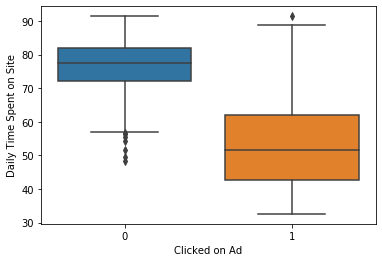

In [3]:
sns.boxplot(y="Daily Time Spent on Site", x="Clicked on Ad", data=df)

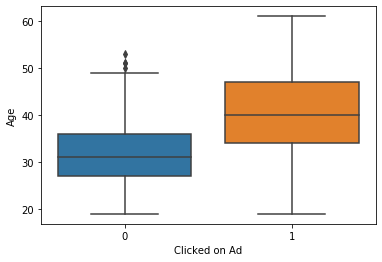

In [6]:
sns.boxplot(y="Age", x="Clicked on Ad", data=df)

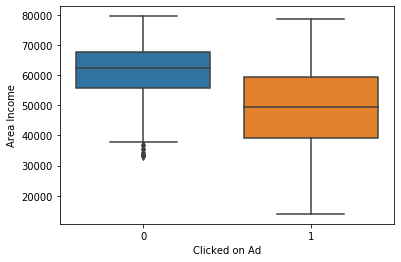

In [7]:
sns.boxplot(y="Area Income", x="Clicked on Ad", data=df)

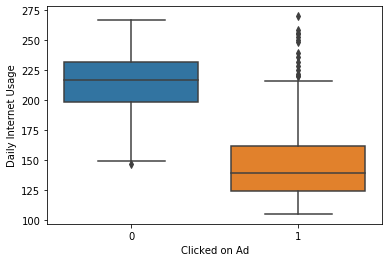

In [8]:
sns.boxplot(y="Daily Internet Usage", x="Clicked on Ad", data=df)

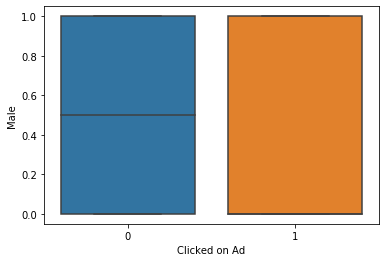

In [10]:
sns.boxplot(y="Male", x="Clicked on Ad", data=df)

## Histogram – Distribution of Target Variable

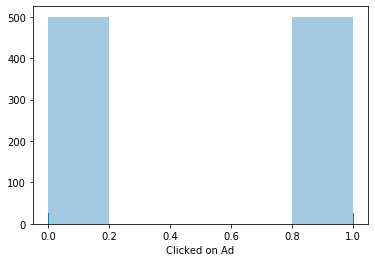

In [13]:
sns.distplot(df['Clicked on Ad'], kde=False, rug=True)

## Distribution Plot – Target Variable 

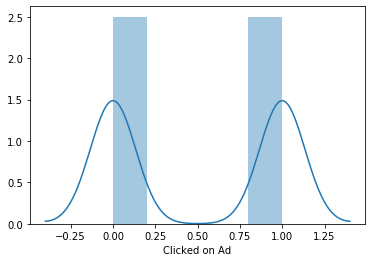

In [15]:
plt.figure(figsize=(6,4))
plt.tight_layout()
seabornInstance.distplot(df['Clicked on Ad'])

## Aggregation for all numerical Columns 

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [19]:
df.aggregate({"Daily Time Spent on Site":['median'], 
              "Age":['median',], 
              "Area Income":['median'],  
              "Daily Internet Usage":['median']}).T

,median
Daily Time Spent on Site,68.215
Age,35.000
Area Income,57012.300
Daily Internet Usage,183.130


## Unique Values across all columns

In [20]:
df.nunique()

Daily Time Spent on Site     900
Age                           43
Area Income                 1000
Daily Internet Usage         966
Ad Topic Line               1000
City                         969
Male                           2
Country                      237
Timestamp                   1000
Clicked on Ad                  2
dtype: int64

## Duplicate values across all columns

In [21]:
duplicateDFRow = df[df.duplicated()]
print(duplicateDFRow)

Empty DataFrame
Columns: [Daily Time Spent on Site, Age, Area Income, Daily Internet Usage, Ad Topic Line, City, Male, Country, Timestamp, Clicked on Ad]
Index: []


It means there are no duplicate values

## Correlation – Heatmap

In [22]:
df.corr().T

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


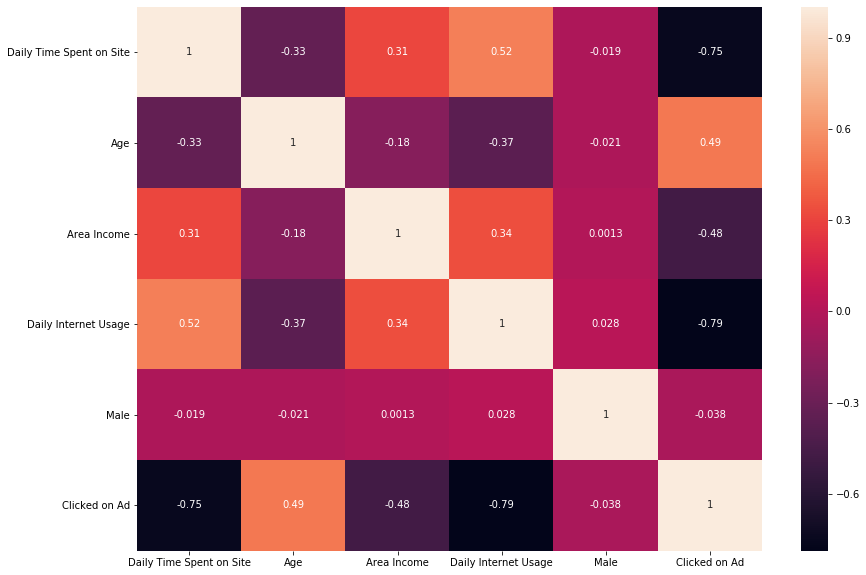

In [23]:
#correlation heat map

fig_dims = (14, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.corr(), annot = True,ax=ax)

## Regression Plot

,Daily Time Spent on Site,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.748117
Clicked on Ad,-0.748117,1.000000


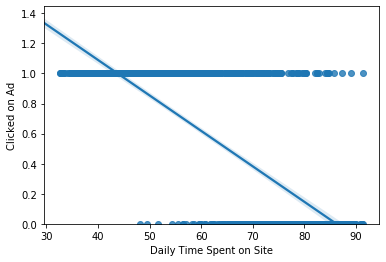

In [30]:
sns.regplot(x="Daily Time Spent on Site", y="Clicked on Ad", data=df)
plt.ylim(0,)
df[["Daily Time Spent on Site", "Clicked on Ad"]].corr()

,Age,Clicked on Ad
Age,1.000000,0.492531
Clicked on Ad,0.492531,1.000000


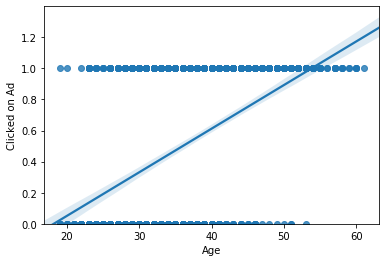

In [31]:
sns.regplot(x="Age", y="Clicked on Ad", data=df)
plt.ylim(0,)
df[["Age", "Clicked on Ad"]].corr()

,Area Income,Clicked on Ad
Area Income,1.000000,-0.476255
Clicked on Ad,-0.476255,1.000000


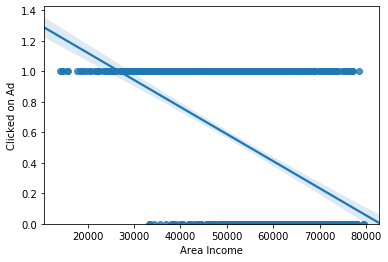

In [32]:
sns.regplot(x="Area Income", y="Clicked on Ad", data=df)
plt.ylim(0,)
df[["Area Income", "Clicked on Ad"]].corr()

,Daily Internet Usage,Clicked on Ad
Daily Internet Usage,1.000000,-0.786539
Clicked on Ad,-0.786539,1.000000


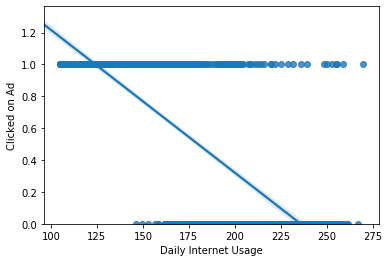

In [33]:
sns.regplot(x="Daily Internet Usage", y="Clicked on Ad", data=df)
plt.ylim(0,)
df[["Daily Internet Usage", "Clicked on Ad"]].corr()

## Bar Plot 

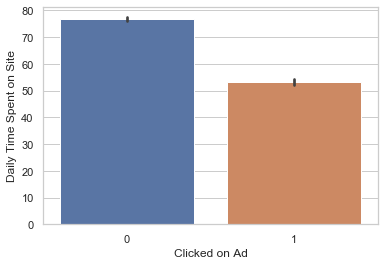

In [34]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Daily Time Spent on Site", x="Clicked on Ad", data=df)

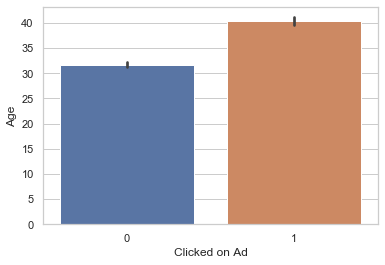

In [35]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Age", x="Clicked on Ad", data=df)

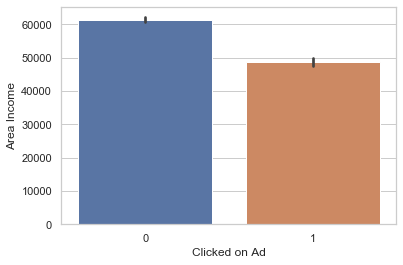

In [36]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Area Income", x="Clicked on Ad", data=df)

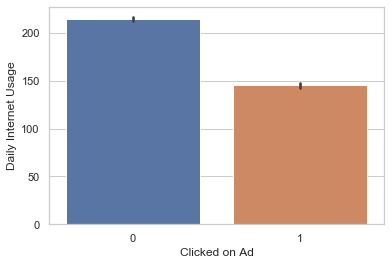

In [37]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Daily Internet Usage", x="Clicked on Ad", data=df)

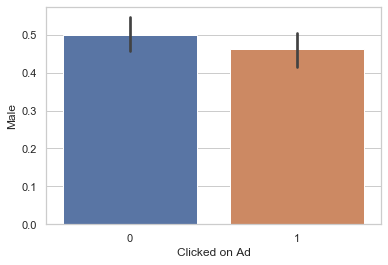

In [40]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Male", x="Clicked on Ad", data=df)

## Pair plot 

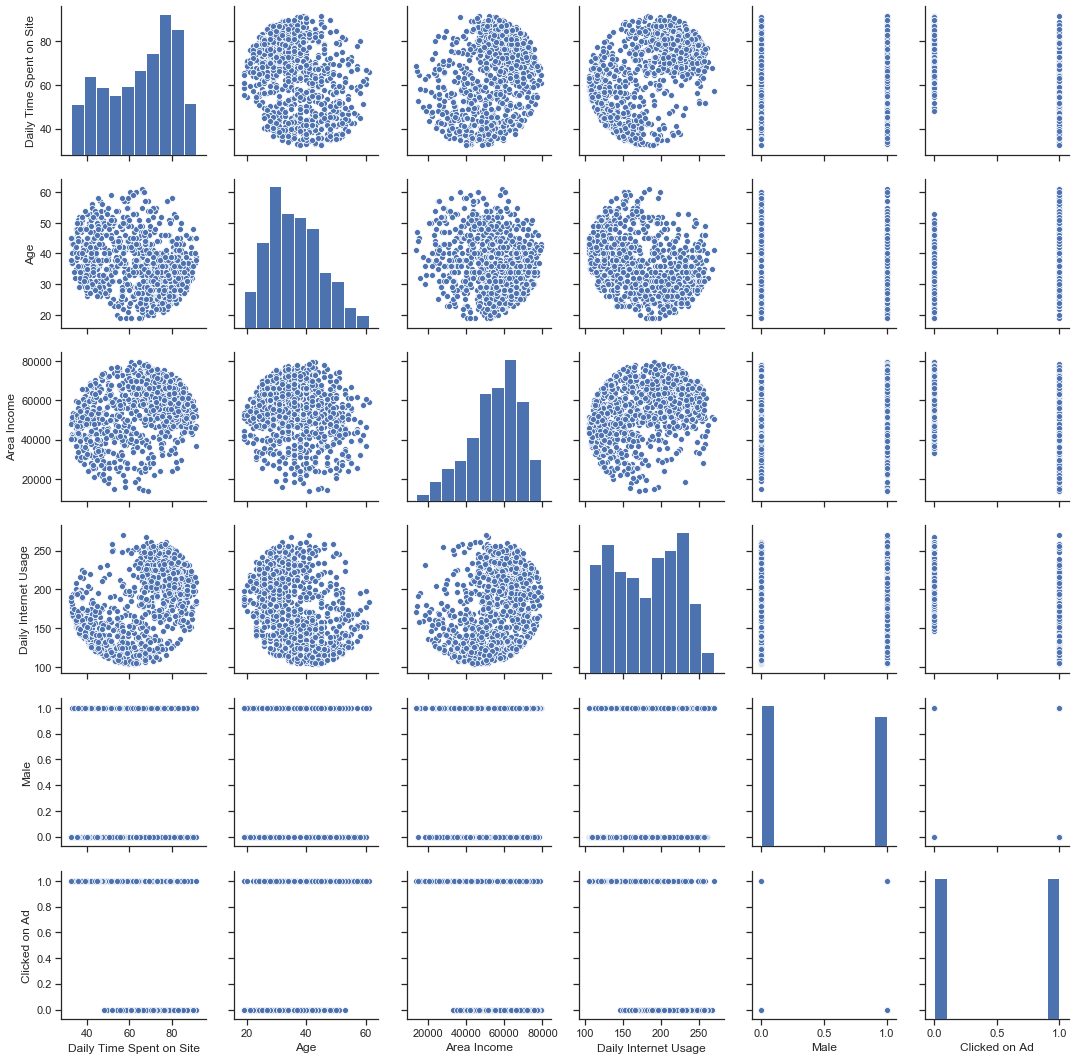

In [41]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

## Droping all non-essential features

In [42]:
df.drop(["Ad Topic Line", "City", "Timestamp","Country"], axis=1,inplace=True)

In [43]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


## Z score for checking Outliers

In [284]:
z1 = np.abs(stats.zscore(df['Age']))
z2 = np.abs(stats.zscore(df['Daily Time Spent on Site']))
z3 = np.abs(stats.zscore(df['Daily Internet Usage']))
z4 = np.abs(stats.zscore(df['Area Income']))

In [46]:
print(np.where (z1>3))
print(np.where (z2>3))
print(np.where (z3>3))
print(np.where (z4>3))

(array([], dtype=int64),)
(array([], dtype=int64),)
(array([], dtype=int64),)
(array([692, 768, 778], dtype=int64),)


In [47]:
df1=df[(z4<3)]

In [49]:
df1.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


# Train and Test Split

In [50]:
from sklearn.model_selection import train_test_split

X= df1.loc[:,df1.columns != 'Clicked on Ad']
y= df1.loc[:,df1.columns == 'Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

# Normalising the data using skelarn’s StandardScaler

In [51]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# RandomForestClassifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [193]:
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [194]:
s_rfc =rfc.score(X_test, y_test)
print('RF=',s_rfc)

RF= 0.956


### Hyperparameter Tuning in Random Forest

In [195]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import time

In [196]:
# checking for best parameter values of bootstrap, max_depth, max_features,min_samples_leaf,
# min_samples_split and n_estimators.


max_depth= [1,2,3,4,5,6,7,8,9,10,11,12,13]
n_estimators= [50,100,200,300,400,500]

param_grid = dict( max_depth=max_depth,  n_estimators=n_estimators)

#### Randomized Search

In [197]:
random = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv = 5, n_jobs=-1,random_state=10)

start_time = time.time()
random_result = random.fit(X, y)

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.962889 using {'n_estimators': 400, 'max_depth': 6}
Execution time: 23.14035201072693 ms


### New RF model with updated parametrs 

In [198]:
# n_estimators=400,max_depth=6
rfc = RandomForestClassifier(random_state=10,n_estimators=400,max_depth=6 )
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [199]:
score1_rfc =rfc.score(X_test, y_test)
score1_rfc

0.964

In [200]:
yhat = rfc.predict(X_test)

In [201]:
yhat_prob = rfc.predict_proba(X_test)

### k fold cross validation

In [202]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn import model_selection

In [203]:
# here k = 5
results=[]
kfold=model_selection.KFold(n_splits=5)
cv_results = model_selection.cross_val_score(rfc,X_train,y_train,cv=kfold, scoring='accuracy')
results.append(cv_results)
print('Random Forest : ',cv_results.mean())

Random Forest :  0.9598389261744966


### AUC, F1 Score, Precision, Recall and Accuracy RF

In [204]:
from sklearn.metrics import classification_report

rf_score= (classification_report(y_test, yhat))
print(rf_score)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       132
           1       0.96      0.97      0.96       118

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



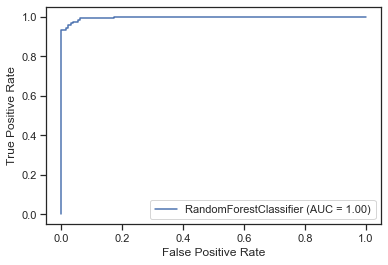

In [205]:
from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(rfc,X_test, y_test)

### Mean Squared Error & Mean Absolute Error

In [221]:
from sklearn import metrics

mae_rf = metrics.mean_absolute_error(y_test, yhat)
print('Mean Absolute Error : ',mae_rf)
mse_rf = metrics.mean_squared_error(y_test, yhat)
print('Mean Squared Error : ',mse_rf)

Mean Absolute Error :  0.036
Mean Squared Error :  0.036


# LogisticRegression

In [68]:
from sklearn.linear_model import LogisticRegression

In [207]:
lr= LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [208]:
score_lr =lr.score(X_test, y_test)
print('LR=',score_lr)

LR= 0.98


### Hyperparameter Tuning in Logistic Regression

In [209]:
max_iter=[100,110,120,130,140,150,200,400]
C = [0.01,0.1,1]
param_grid = dict(max_iter=max_iter,C=C)

In [210]:
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 5, n_jobs=-1,random_state=10)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.905734 using {'max_iter': 150, 'C': 1}
Execution time: 2.6455140113830566 ms


### New LR model with updated parametrs 

In [211]:
lr= LogisticRegression(C=1,max_iter=150)
lr.fit(X_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [212]:
score1_lr =lr.score(X_test, y_test)
print('LR=',score1_lr)

LR= 0.98


In [214]:
y1hat = lr.predict(X_test)

In [213]:
y1hat_prob = rfc.predict_proba(X_test)

### K Fold cross validation

In [215]:
results1=[]
kfold1=model_selection.KFold(n_splits=5)
cv_results1 = model_selection.cross_val_score(lr,X_train,y_train,cv=kfold1, scoring='accuracy')
results1.append(cv_results1)
print('Logistic Regression : ',cv_results1.mean())

Logistic Regression :  0.9651901565995527


### Confusion matrix RF

In [216]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [217]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y1hat, labels=[1,0]))

[[115   3]
 [  2 130]]


Confusion matrix, without normalization
[[115   3]
 [  2 130]]


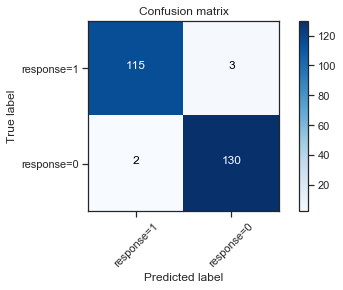

In [218]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y1hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['response=1','response=0'],normalize= False,  title='Confusion matrix')

 ###  F1 Score, Precision, Recall, Accuracy and AUC for LR

In [222]:
lr_score=(classification_report(y_test, y1hat))
print (lr_score)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       132
           1       0.98      0.97      0.98       118

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



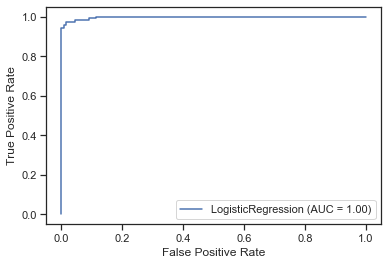

In [223]:
disp=plot_roc_curve(lr,X_test, y_test)

### Mean Squared Error & Mean Absolute Error

In [224]:
mae_lr = metrics.mean_absolute_error(y_test, y1hat)
print('Mean Absolute Error : ',mae_lr)
mse_lr = metrics.mean_squared_error(y_test, y1hat)
print('Mean Squared Error : ',mse_lr)

Mean Absolute Error :  0.02
Mean Squared Error :  0.02


# Support Vector Machine

In [225]:
from sklearn import svm

In [226]:
svmc = svm.SVC(kernel='rbf')
svmc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [227]:
score_svmc =svmc.score(X_test, y_test)
print('SVM = ',score_svmc)

SVM =  0.968


### Hyperparameter Tuning in SVM

In [258]:
C=[1,2,3,8,10,11,14,16,17,18]
degree=[1,2,3,4,5,6,7,8,9,10]
param_grid = dict(C=C,degree=degree)

In [259]:
random = RandomizedSearchCV(estimator=svmc, param_distributions=param_grid, cv = 5, n_jobs=-1,random_state=10)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.718131 using {'degree': 4, 'C': 10}
Execution time: 3.306065320968628 ms


### New SVM model with updated parametrs 

In [262]:
svmc = svm.SVC(kernel='rbf',degree= 4,C=18)
svmc.fit(X_train, y_train)

SVC(C=18, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [263]:
score1_svmc =svmc.score(X_test, y_test)
print('SVM = ',score1_svmc)

SVM =  0.968


In [264]:
y2hat = svmc.predict(X_test)

### Validating using 5 fold cross validation

In [267]:
results2=[]
kfold2=model_selection.KFold(n_splits=5)
cv_results2 = model_selection.cross_val_score(svmc,X_train,y_train,cv=kfold2, scoring='accuracy')
results2.append(cv_results2)
print('SVM : ',cv_results2.mean())

SVM :  0.951821029082774


 ###  F1 Score, Precision, Recall, Accuracy and AUC for SVM

In [268]:
svm_score= (classification_report(y_test, y2hat))
print(svm_score)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.97      0.96      0.97       118

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



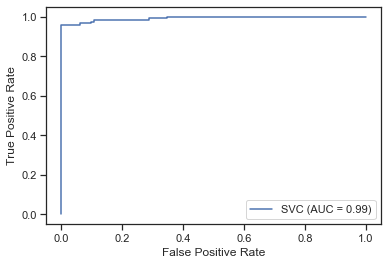

In [269]:
disp=plot_roc_curve(svmc,X_test, y_test);

### Mean Squared Error & Mean Absolute Error

In [270]:
mae_svm = metrics.mean_absolute_error(y_test, y2hat)
print('Mean Absolute Error : ',mae_svm)
mse_svm = metrics.mean_squared_error(y_test, y2hat)
print('Mean Squared Error : ',mse_svm)

Mean Absolute Error :  0.032
Mean Squared Error :  0.032


# K-NeighborsClassifier

In [271]:
from sklearn.neighbors import KNeighborsClassifier

In [274]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [275]:
s_knn =knn.score(X_test, y_test)
print('KNN=',s_knn)

KNN= 0.964


### Hyperparameter Tuning in KNN

In [276]:
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
n_neighbors=range(1,21)
weights=['uniform', 'distance']
param_grid = dict(algorithm=algorithm,n_neighbors=n_neighbors,weights=weights)

In [277]:
random = RandomizedSearchCV(estimator=knn, param_distributions=param_grid, cv = 5, n_jobs=-1,random_state=10)

start_time = time.time()
random_result = random.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.778362 using {'weights': 'distance', 'n_neighbors': 4, 'algorithm': 'ball_tree'}
Execution time: 1.190077781677246 ms


### New KNN model with updated parametrs 

In [278]:
knn = KNeighborsClassifier(weights='distance',algorithm= 'ball_tree',n_neighbors = 4)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [279]:
s1_knn =knn.score(X_test, y_test)
print('KNN=',s1_knn)

KNN= 0.972


In [280]:
y3hat = knn.predict(X_test)

### Validating using 5 fold cross validation

In [281]:
results3=[]
kfold3=model_selection.KFold(n_splits=5)
cv_results3 = model_selection.cross_val_score(knn,X_train,y_train,cv=kfold3, scoring='accuracy')
results3.append(cv_results3)
print('KNN : ',cv_results3.mean())

KNN :  0.9558299776286354


 ###  F1 Score, Precision, Recall, Accuracy and AUC for KNN

In [282]:
knn_score=classification_report(y_test, y3hat)
print(knn_score)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.98      0.96      0.97       118

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



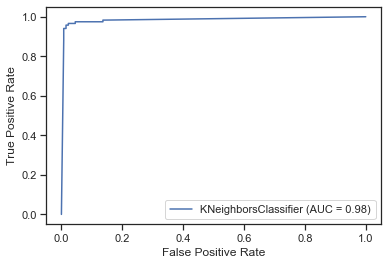

In [283]:
disp=plot_roc_curve(knn,X_test, y_test)

### Mean Squared Error & Mean Absolute Error

In [285]:
mae_knn = metrics.mean_absolute_error(y_test, y3hat)
print('Mean Absolute Error : ',mae_knn)
mse_knn = metrics.mean_squared_error(y_test, y3hat)
print('Mean Squared Error : ',mse_knn)

Mean Absolute Error :  0.028
Mean Squared Error :  0.028


# Conclusion

In [286]:
print('01. RANDOM FOREST : \n',rf_score)
print('02. LOGISTIC REGRESSION : \n',lr_score)
print('03. SUPPORT VECTOR MACHINE : \n',svm_score)
print('04. K-NEAREST NEIGHBORS : \n',knn_score)

01. RANDOM FOREST : 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       132
           1       0.96      0.97      0.96       118

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250

02. LOGISTIC REGRESSION : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       132
           1       0.98      0.97      0.98       118

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

03. SUPPORT VECTOR MACHINE : 
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       132
           1       0.97      0.96      0.97       118

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97    

## ROC & AUC Comparison plot

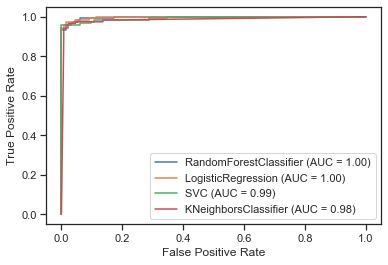

In [287]:
disp=plot_roc_curve(rfc,X_test, y_test)
plot_roc_curve(lr,X_test, y_test,ax=disp.ax_);
plot_roc_curve(svmc,X_test, y_test,ax=disp.ax_);
plot_roc_curve(knn,X_test, y_test,ax=disp.ax_);

In [291]:
compare_models = pd.DataFrame( 
    {  'Model' : ['RANDOM FOREST','LOGISTIC REGRESSION', 'SUPPORT VECTOR MACHINE','K-NEAREST NEIGHBORS'], 
     'Model Score' : [score1_rfc ,score1_lr, score1_svmc, s1_knn] , 
     'Score after CV' : [cv_results.mean(), cv_results1.mean(),cv_results2.mean(),cv_results3.mean()],
       'AUC' : ['0.99','1.00','1.00','0.99'],
        'Mean Absolute Error'  : [mae_rf, mae_lr, mae_svm, mae_knn], 
        'Mean Squared Error'  : [mse_rf, mse_lr, mse_svm, mse_knn] 
    })  

In [292]:
compare_models.T

,0,1,2,3
Model,RANDOM FOREST,LOGISTIC REGRESSION,SUPPORT VECTOR MACHINE,K-NEAREST NEIGHBORS
Model Score,0.964,0.98,0.968,0.972
Score after CV,0.959839,0.96519,0.951821,0.95583
AUC,0.99,1.00,1.00,0.99
Mean Absolute Error,0.036,0.02,0.032,0.028
Mean Squared Error,0.036,0.02,0.032,0.028


## For Logistic Regression 

<h4>LR Score                  : 0.98</h4> 
<h4>LR Score after k fold cv  : 0.96</h4>
<h4>AUC                       : 1.00</h4>
<h4>Precision                 : 0.98</h4>
<h4>MEA                       : 0.02</h4>
<h4>MAE                       : 0.02</h4>

### So the model with the highest  Accuracy,  Prescision,  AUC and lowest  MAE,  MSE  is  LOGISTIC REGRESSION

<h4>Submitted By : Yogender Kushwaha</h4>
<h4>LinkedIn: click <a href="https://www.linkedin.com/in/yogender-kushwaha/">HERE</a></h4>